In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import theano
import theano.tensor as T
import matplotlib.pyplot as plt

import os, sys
sys.path.append('../code')

from retina2 import *

/home/oalenkin/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import warnings
warnings.filterwarnings('ignore')

# reading data

In [3]:
data = pd.read_csv('../data/hits.csv', index_col=0)

# demonstration of z_distance

In [3]:
real = []
exp = []
for event_i in set(data.EventID.values):
    event = data[data.EventID==event_i]
    track1 = event[(event.TrackID==2)&(event.StatNb<3)]
    track_params = get_track_params(track1, 2)
    for i in range(len(track1)):
        start, direction, z0 = ends2params(track1[['Wx1', 'Wy1', 'Wz', 'Wx2', 'Wy2', 'Wz']].values[i])
        exp.append(z_distance(track_params, z0, start, direction))
        real.append(track1.dist2Wire.values[i])
        
    track2 = event[(event.TrackID==3)&(event.StatNb<3)]
    track_params = get_track_params(track2, 3)
    for i in range(len(track2)):
        start, direction, z0 = ends2params(track2[['Wx1', 'Wy1', 'Wz', 'Wx2', 'Wy2', 'Wz']].values[i])
        exp.append(z_distance(track_params, z0, start, direction))
        real.append(track2.dist2Wire.values[i])

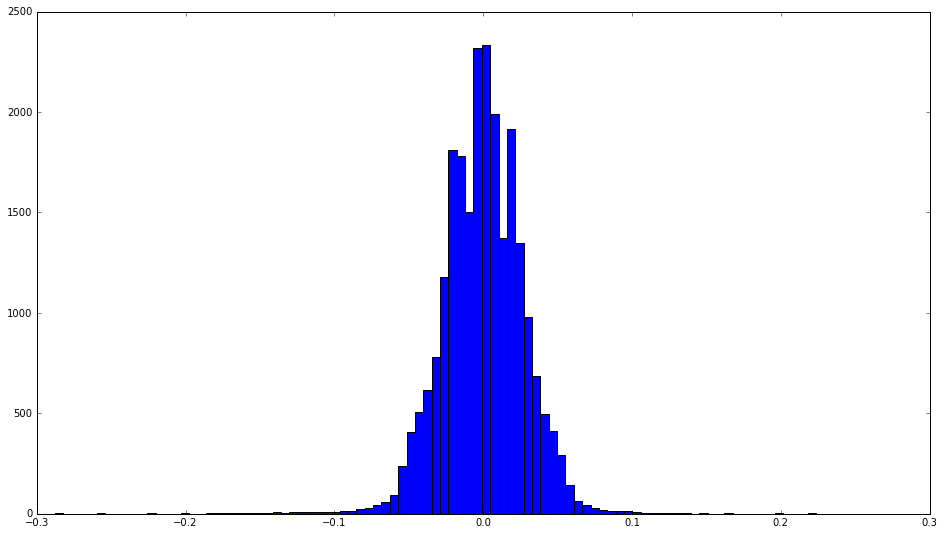

In [4]:
plt.figure(figsize=(16,9))
hist_arr = plt.hist(np.array(real)-np.array(exp), bins=100)

# choose event

In [4]:
event = data[data.EventID==2]
event_before_magnet = event[event.StatNb<3]

# how to use artifitial_retina_response()

In [43]:
artifitial_retina_response(track1, event_before_magnet[['Wx1', 'Wy1', 'Wz', 'Wx2', 'Wy2', 'Wz']].values, 10)

33.478392853088529

In [44]:
artifitial_retina_response([4.25461110e+01, 1.03470809e-02, 3.03522450e+00, -2.16322858e-04], event_before_magnet[['Wx1', 'Wy1', 'Wz', 'Wx2', 'Wy2', 'Wz']].values, 10)


34.489868472054013

# 2D projections

In [20]:
size = 20
ms = np.linspace(-0.1, 0.1, size)
y0s = np.linspace(-500, 500, size)
ls = np.linspace(-0.1, 0.1, size)
x0s = np.linspace(-250, 250, size)

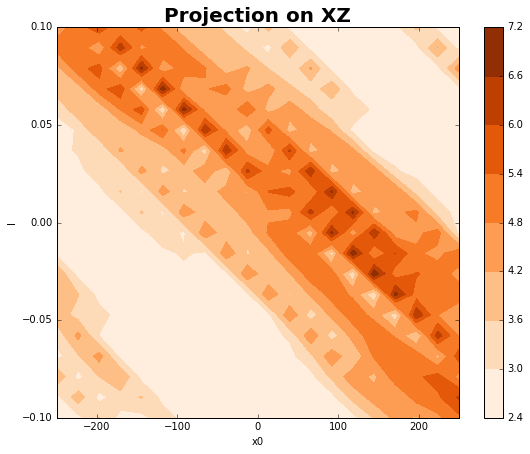

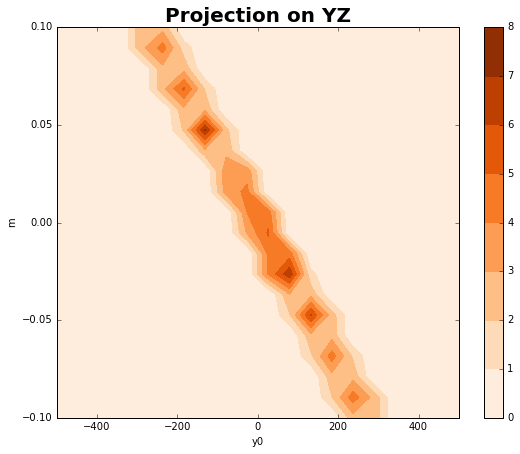

In [21]:
projections = plot_artifitial_retina_response(event_before_magnet, [x0s, ls, y0s, ms], 1)

In [5]:
track1 = get_track_params(event_before_magnet, 2)
track1

[43.76241890491,
 0.011467342483359991,
 6.0624280360975797,
 -0.0020229836340624773]

In [6]:
track2 = get_track_params(event_before_magnet, 3)
track2

[88.338425296568971,
 -0.0092683439167328685,
 -12.820928680230884,
 0.006479333198265858]

# track finding

In [7]:
retina = RetinaTrackReconstruction()

In [8]:
array_of_initial_parameters = []
for i in np.linspace(-500, 500, 15):
    array_of_initial_parameters.append([0, 0, i, 0])
array_of_initial_parameters = np.array(array_of_initial_parameters)

In [9]:
dots_array = retina.fit(event_before_magnet[['Wx1', 'Wy1', 'Wz', 'Wx2', 'Wy2', 'Wz']].values, \
                        array_of_initial_parameters)

KeyboardInterrupt: 

In [10]:
retina.R(dots_array[0][8])

-0.0

In [11]:
dots_array[0][-1]

array([  2.06555194e+01,   1.73288288e-02,  -5.37786064e+01,
         2.10449294e-02])

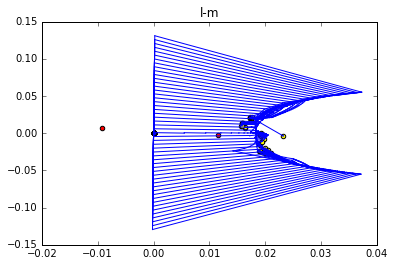

In [12]:
for dots in dots_array:
    plt.scatter(dots[0][1], dots[0][3], c='blue')
    plt.scatter(dots[-1][1], dots[-1][3], c='yellow')
    for j in range(len(dots)-1):
        plt.plot([dots[j][1], dots[j+1][1]], [dots[j][3], dots[j+1][3]], c='blue')

plt.scatter(track1[1], track1[3], c='red')
plt.scatter(track2[1], track2[3], c='red')
plt.title('l-m')

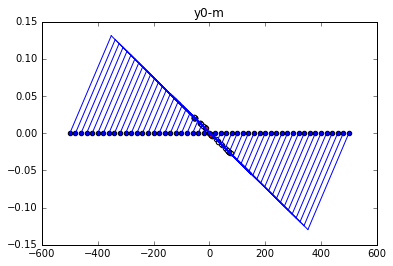

In [13]:
for dots in dots_array:
    plt.scatter(dots[0][2], dots[0][3], c='blue')
    plt.scatter(dots[-1][2], dots[-1][3], c='yellow')
    for j in range(len(dots)-1):
        plt.plot([dots[j][2], dots[j+1][2]], [dots[j][3], dots[j+1][3]], c='blue')
        
plt.scatter(track1[2], track1[3], c='red')
plt.scatter(track2[2], track2[3], c='red')
plt.title('y0-m')

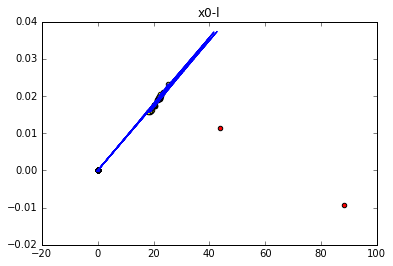

In [14]:
for dots in dots_array:
    plt.scatter(dots[0][0], dots[0][1], c='blue')
    plt.scatter(dots[-1][0], dots[-1][1], c='yellow')
    for j in range(len(dots)-1):
        plt.plot([dots[j][0], dots[j+1][0]], [dots[j][1], dots[j+1][1]], c='blue')
        
plt.scatter(track1[0], track1[1], c='red')
plt.scatter(track2[0], track2[1], c='red')
plt.title('x0-l')

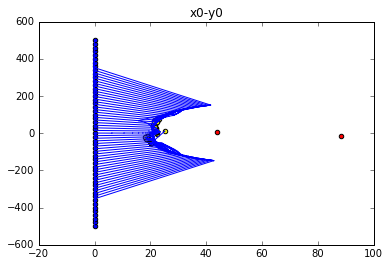

In [15]:
for dots in dots_array:
    plt.scatter(dots[0][0], dots[0][2], c='blue')
    plt.scatter(dots[-1][0], dots[-1][2], c='yellow')
    for j in range(len(dots)-1):
        plt.plot([dots[j][0], dots[j+1][0]], [dots[j][2], dots[j+1][2]], c='blue')
        
plt.scatter(track1[0], track1[2], c='red')
plt.scatter(track2[0], track2[2], c='red')
plt.title('x0-y0')

# artifitial test

In [49]:
art_event = event[(event.index==79)|(event.index==87)]

In [50]:
plot_artifitial_retina_response(art_event, [x0s, ls, y0s, ms], 1)

NameError: name 'x0s' is not defined

In [51]:
new_dots_array = retina.fit(art_event[['Wx1', 'Wy1', 'Wz', 'Wx2', 'Wy2', 'Wz']].values, \
                        array_of_initial_parameters)

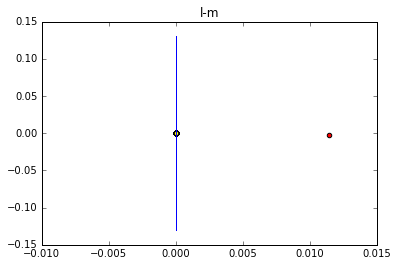

In [52]:
for dots in new_dots_array:
    plt.scatter(dots[0][1], dots[0][3], c='blue')
    plt.scatter(dots[-1][1], dots[-1][3], c='yellow')
    for j in range(len(dots)-1):
        plt.plot([dots[j][1], dots[j+1][1]], [dots[j][3], dots[j+1][3]], c='blue')

plt.scatter(track1[1], track1[3], c='red')
plt.title('l-m')

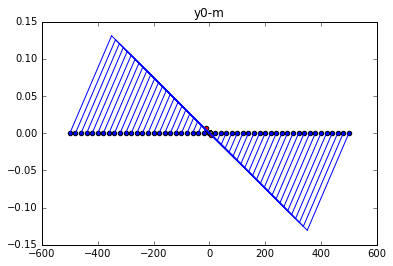

In [53]:
for dots in new_dots_array:
    plt.scatter(dots[0][2], dots[0][3], c='blue')
    plt.scatter(dots[-1][2], dots[-1][3], c='yellow')
    for j in range(len(dots)-1):
        plt.plot([dots[j][2], dots[j+1][2]], [dots[j][3], dots[j+1][3]], c='blue')
        
plt.scatter(track1[2], track1[3], c='red')
plt.scatter(track2[2], track2[3], c='red')
plt.title('y0-m')

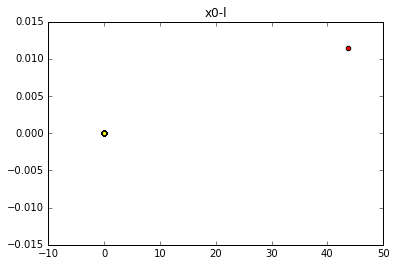

In [54]:
for dots in new_dots_array:
    plt.scatter(dots[0][0], dots[0][1], c='blue')
    plt.scatter(dots[-1][0], dots[-1][1], c='yellow')
    for j in range(len(dots)-1):
        plt.plot([dots[j][0], dots[j+1][0]], [dots[j][1], dots[j+1][1]], c='blue')
        
plt.scatter(track1[0], track1[1], c='red')
plt.title('x0-l')

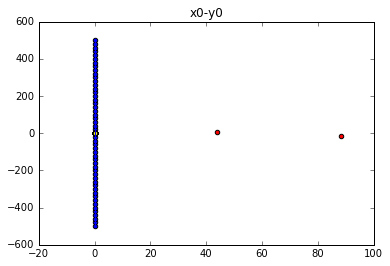

In [55]:
for dots in new_dots_array:
    plt.scatter(dots[0][0], dots[0][2], c='blue')
    plt.scatter(dots[-1][0], dots[-1][2], c='yellow')
    for j in range(len(dots)-1):
        plt.plot([dots[j][0], dots[j+1][0]], [dots[j][2], dots[j+1][2]], c='blue')
        
plt.scatter(track1[0], track1[2], c='red')
plt.scatter(track2[0], track2[2], c='red')
plt.title('x0-y0')